<a href="https://colab.research.google.com/github/yanlobianchi/sistemasdistribuidos.restapi/blob/master/halos_mens_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

# Conectando ao Google Drive 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!nvidia-smi

# Detalhes da GPU na nuvem 

Mon Apr 11 20:21:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install scipy==1.1.0

# Biblioteca Open Source necessária 
# Manipulação conveniente e rápida de um array N-dimensional

In [ ]:
!pip install Pillow imageio

# Plugin que envolve a biblioteca Pillow. 
# Pillow é um fork amigável do PIL (Python Image Library) e suporta leitura e escrita de formatos comuns (jpg, png, gif, tiff, …)

In [ ]:
!pip install opencv-python-headless==4.5.2.52

# Biblioteca multiplataforma, para o desenvolvimento de programas em Visão Computacional

**Bibliotecas necessárias**

In [ ]:
import numpy as np
# Processamento de grandes, multi-dimensionais arranjos e matrizes

from keras.layers import Lambda
# Salvar e inspecionar um modelo

import tensorflow as tf
# Versão com suporte a GPUs e CPUs (Ubuntu e Windows) | tf = visualização (instável)

from skimage import data, io, filters
# Coleção de algoritmos para processamento de imagens

from numpy import array
# Tabela multidimensional de elementos do mesmo tipo, indexados por uma tupla de inteiros positivos

from numpy.random import randint
# Retorna inteiros aleatórios da distribuição “discreta uniforme” do dtype especificado no intervalo “semi-aberto” [low, high)

import os
# Automação de processos no Python

import sys
# Passar argumentos para o Python a partir da linha de comando

import cv2
# Tornar a visão computacional mais acessível

from statistics import mean
# Funções para calcular estatísticas matemáticas de dados numéricos (valores reais)

from PIL import ImageFont, ImageDraw, Image
# ImageDrawf ornece gráficos 2D simples para Image objetos. ImageFont = fonte das imagens. PIL é a biblioteca de imagens do Python

In [ ]:
def uint8(data):
    # Uint8 é um inteiro sem sinal (0 a 255) uint16. Inteiro sem sinal (0 a 65535)
    # Pixel máximo
    latch = np.zeros_like(data)
    latch[:] = 255

    zeros = np.zeros_like(data)
    # Pixel mínimo

    d = np.maximum(zeros, data)
    d = np.minimum(latch, d)
    # Ilustrando as etapas

    return np.asarray(d, dtype="uint8")
    # Cast para uint8 (converte um valor de variável de um tipo para outro. Ou seja, feito com funções como int() ou float() ou str()

**Find_halo**

In [ ]:
def find_halo(img_temp,media_discos, centerTemp): 
    # plt.imshow(img_temp)
    # Está passando img_temp = cortou área dos halos e discos, são imagens diferentes
    # O corte está sendo feito na imagem dos halos, a media_discos é a área de endereço, então procura um raio a partir do ponto que pode
    # Como a imagem dos halos é branca, porque teve o processamento de > que, 255 etc., onde for preto, o halo acaba, mas só essa regra não é suficiente, 
    # porque se chegar na borda da imagem, será ruim, porque significa que tem o halo máximo, então já é sensível, visto que o processo é qualitativo e não quantitativo
    centro_img = np.ceil([centerTemp[0], centerTemp[1]]).astype(int)
    r_temp = np.zeros((4,1))
    media_discos = np.ceil(media_discos).astype(int)
    # print(f"Centro Img = {centro_img} ")

    # Procurando branco na coluna central
    for i in range(centro_img[1] - media_discos+2,1, -1):
      if i == 0 or img_temp[centro_img[0], i] == 0:
          r_temp[0] = centro_img[1] - i
          break

    for i in range(centro_img[1] + media_discos - 2,img_temp.shape[1]-1):
      if i == img_temp.shape[1]-1 or img_temp[centro_img[0], i] == 0:
          r_temp[1] = centro_img[1]-i
          break

    # Procurando na linha central
    for i in range(centro_img[0] - media_discos+2, 1, -1):
      if i == 0 or img_temp[i,centro_img[1]] == 0:
          r_temp[2] = centro_img[0] - i
          break

    # Faz para 4 direções, pega o centro e anda até o limite do disco, 
    # que é permitido e vai até a borda da imagem, sendo para cima, para direita, esquerda e para baixo.  

    for i in range(centro_img[0] + media_discos - 2,img_temp.shape[0]-1):
      if i == img_temp.shape[0]-1 or img_temp[i,centro_img[1]]== 0:
          r_temp[3] = centro_img[0]-i
          break

    # print(f"R_temp {r_temp}, Media= {media_discos}")
    r_temp = np.abs(r_temp)
  
    eliminar = []
    if not (r_temp[0] > 0 and r_temp[0] >= media_discos) :
        eliminar.append(0)
    
    if not (r_temp[2] > 0 and r_temp[2] >= media_discos) :
        eliminar.append(2)
    
    if not (r_temp[1] < img_temp.shape[0] and r_temp[1] >= media_discos) :
         eliminar.append(1)
    
    if not (r_temp[3] < img_temp.shape[1] and r_temp[3] >= media_discos) :
         eliminar.append(3)
    # print(f'raio: {r_temp}, shape: {img_temp.shape}, Eliminar: {eliminar}')
    # Calculado para não ter improbidade, de todo jeito pega uma posição, aí chega no limite do disco, anda uma casa e acha preta, 
    # o algoritmo já para. Vai garantir que não irá pegar nada que esteja no tamanho do disco, com base do limite permito de 1.5

    if len(eliminar) > 0:
        eliminar.sort(reverse=True)
        r_temp= np.delete(r_temp, eliminar)
    # print(len(eliminar))
    # print(f"Eliminar: {eliminar}")
    # Elima as posições desncessárias 

    r = []

    r_temp.astype(int)
    if r_temp.shape[0] < 2: # Se r_temp for maior que 2 (se não foi em duas direções que tem halo), então é zerado
                            # Se não é retornado r=men (média dos raios), por isso tem uns halos que ficam maior, 
                            # porque tem um a ponta maior, então vai mais para uma ponta e aumenta a média, por isso não pega exatamente 
        r = 0
    else:
      r = int(np.mean(r_temp))
    # print(f'r {r}')
    return r

**Get_Discos**

In [ ]:
def get_discos(discos_area, origin_image, get_image = 0): 
  # Função para localizar os discos 
  centers=[] # Centro
  radii=[] # Raio 
  o=origin_image # Imagem original 
  gray_blurred = cv2.blur(discos_area, (2, 2)) 
  # cv2.blur()é usado para desfocar uma imagem usando o filtro de caixa normalizado
  # gray_blurred = cv2.blur(discos_area, (3, 3))

  detected_circles = cv2.HoughCircles(gray_blurred, 
  # Detectando os círculos nas imagens 
                    cv2.HOUGH_GRADIENT, 1, 20, param1 = 20, 
                    # Em vez de desenhar o círculo completo, apenas incrementamos as células do acumulador na direção do gradiente de cada pixel da borda
                param2 = 21, minRadius = 1, maxRadius = 500) 
                    # Parametros, valores mínimos e máximos do raio

  if detected_circles is not None:  
  # Caso detecte os círculos
      detected_circles = np.uint16(np.around(detected_circles)) 
      # np.around é para arredondar uniformemente para o número determinado de decimais.
      # print(detected_circles)
      for pt in detected_circles[0, :]:
          a, b, r = pt[0], pt[1], pt[2]
          centers.append([a,b])
          radii.append(r)

          # Converta os parâmetros de círculo a, b e r em inteiros
  else:
      assert (detected_circles is None), TypeError('Não foi encontrado discos')
  # print(radii)

  if get_image==1:
    for pt in detected_circles[0, :]:
      a, b, r = pt[0], pt[1], pt[2]
      # Desenha a circunferência do círculo 
      cv2.circle(origin_image, (a, b), r, (0, 127, 255), 2)
      
    return centers, radii, origin_image
  return centers, radii

**Get_halos_area**

In [ ]:
def get_halos_area(image = None): # Área dos halos
  aux = uint8(np.zeros((image.shape))) # Uint8 é um inteiro sem sinal nas imagens 
  for i in np.arange(0,image.shape[1-1]).reshape(-1):
      for j in np.arange(0,image.shape[2-1]).reshape(-1):
          if image[i,j] > 110 and image[i,j] < 200: # A imagem dos halos é branca, visto teve o processamento > 110 e < 200 
              aux[i,j] = 255 # Onde for preto, o halo acaba, mas só essa regra não é suficiente para validar o processo 
  
  saida = aux
  return saida

**Get_image_halos**

In [ ]:
def get_image_halos(discos_area,halos_area, origin_image):
    # localizar os discos
    o=origin_image
    centersBright,radiiBright = get_discos(discos_area, o)
    # Calcular média dos discos já aplicando outra regra de 50#
    tam_discos = np.mean(radiiBright) 
    # O tamanho dos discos é a média do raio, retorna o centro do disco, 
    # ou seja, pega o centro e se rodar um raio, estará dentro do disco 
    # A média do raio é o tamanho do disco

    media_discos = np.ceil(np.mean(radiiBright) * 1.5)
    # Se o halo tiver o tamanho do disco + 50%, significa que não tem halo inibitório
    saida = origin_image
    # cortar área para calc do halo
    # 1 = inicio do x e 2 o fim
    # 3 inicio do y e 4 fim
    # cortes = np.zeros((15,4))
    tam_corte = 6 # tamanho do corte 
    aqui=0
    cortes=[] # cortes 
    for j in range(0,len(centersBright)): 
      a = centersBright[j][1] - (tam_corte * radiiBright[j])-1
      b =  centersBright[j][1] + (tam_corte * radiiBright[j])
      c =  centersBright[j][0] - (tam_corte * radiiBright[j])
      d =  centersBright[j][0] + (tam_corte * radiiBright[j])
      cortes.append([a, b, c, d])
      # print([a, b, c, d])
      # Após localizar a área do disco, um halo máximo é alcançado
      # Se passar do halo máximo, a bactéria já é sensível
      # Depois disso é definido o tamanho máximo do corte do halo, vai cortando halo a halo
      # Então pega um disco e corta a área máxima em volta dele que o halo pode estar e é procurado

    cortes = np.ceil(cortes).astype(int)
    for i in np.arange(0,cortes.shape[0]).reshape(-1).astype(int):
        corte_temp = cortes[i,:]
        
        # Cortando halo a halo 
        if corte_temp[0] < 1:
            corte_temp[0] = 0
        if corte_temp[1] > halos_area.shape[0]:
            corte_temp[1] = halos_area.shape[0]-1
        if corte_temp[2] < 1:
            corte_temp[2] = 0
        if corte_temp[3] > halos_area.shape[1]:
            corte_temp[3] = halos_area.shape[1]-1
        centerTemp=abs(np.array([corte_temp[0]-centersBright[i][1], corte_temp[2]-centersBright[i][0]]))
        centerTemp.astype(int)
        img_temp = halos_area[corte_temp[0]:corte_temp[1]+1,corte_temp[2]:corte_temp[3]+1]
        # print(f"Center= {centerTemp}, True center: {centersBright[i]}, Shape: {img_temp.shape}, Cortes {corte_temp}, Cortes o {cortes[i,:]}")
        r = find_halo(img_temp,media_discos, centerTemp)
     
        if r > 0:
          raioEmMM = (r * 7 / 2) / tam_discos 
          # Calculo do tamanho do halo 
          # O disco tem 7 mm, se dividi por 2, acha o raio, se multiplica o raio do disco pelo raio encontrado e dividi pelo tamanho do disco original, 
          # então a área do halo é encontrado, uma média em relação a todos os discos das imagens
          texto = f"{round(raioEmMM * 2,2)} mm" # Retorna em mm
          # texto=f'{r}'
          p=centersBright[i]
          
          cv2.circle(saida, (p[0], p[1]), int(r), (255, 125, 125), 2)
          # Texto na imagem 
          cv2_im_rgb = saida
          pil_im = Image.fromarray(cv2_im_rgb)
          draw = ImageDraw.Draw(pil_im)
          draw.text((centersBright[i][0]-12, centersBright[i][1]-25), texto)
          cv2_im_processed = np.array(pil_im)
          saida=cv2_im_processed
          cv2.imwrite("/content/resultTemp.png", cv2_im_processed) # Resultado final do processamento 
        
    return saida

**Main**

In [ ]:
# Imread lê uma imagem. Resize redimensiona a imagem para melhorar o desempenho da máquina. Imshow exibe a imagem
from cv2 import imread, resize, imshow

# Diretório da imagem original em jpg (a extensão da imagem original deve ser igual a da label)
origin_image = cv2.imread('/content/gdrive/MyDrive/Images/Original/33.jpg', cv2.IMREAD_UNCHANGED)

# Diretório da label em jpg, referente a imagem original. O redimensionamento da label não interfere na detecção do tamanho do halo
image = cv2.imread('/content/gdrive/MyDrive/Images/Label/40.jpg', cv2.IMREAD_UNCHANGED)

# BGR é convertido em RGB
origin_image=cv2.cvtColor(origin_image, cv2.COLOR_BGR2RGB)
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Exibe as dimensões das imagens
print('Dimensões originais: ', origin_image.shape)
print('Dimensões originais: ', image.shape)

Dimensões originais:  (2688, 2691, 3)
Dimensões originais:  (2688, 2691, 3)


In [ ]:
# Largura da imagem em 512
width = int(512)

# Altura da imagem em 512
height = int(512)

# Tamanho recebe largura e altura 
tam = (width, height)

origin_image_res=cv2.resize(origin_image, tam, interpolation = cv2.INTER_AREA)
image_res=cv2.resize(image, tam, interpolation = cv2.INTER_AREA)

print(origin_image_res.shape) 
print(image_res.shape) 

import matplotlib.pyplot as plt 

(512, 512, 3)
(512, 512, 3)


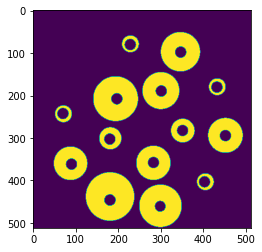

In [ ]:
# halos_area precisa saber a área dos discos
halos_area = get_halos_area(image_res[:,:,0])

# Exibe a área dos halos
plt.imshow(halos_area)

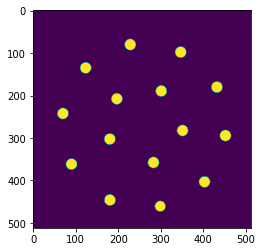

In [ ]:
# discos_area precisa saber a área dos discos
discos_area = uint8(image_res[:,:,1] > 20) * 255

# Exibe a área dos halos
plt.imshow(discos_area)

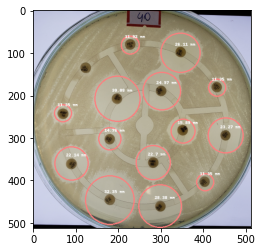

In [ ]:
# Calculaa a área dos halos
saida = get_image_halos(discos_area,halos_area,origin_image_res)

# Desenha os discos na imagem original
plt.imshow(saida)

True

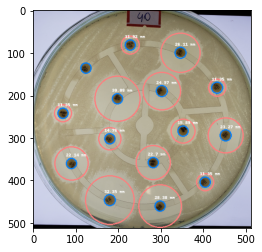

In [ ]:
centers, radii, origin_image = get_discos(discos_area,saida, get_image=1)
plt.imshow(origin_image) # Exibindo a imagem processada 
cv2.imwrite('/content/result.png', cv2.cvtColor(origin_image, cv2.COLOR_RGB2BGR)) # Resultado final do processamento 